In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("/content/Wine_quality_white_1.csv")


In [3]:
print(dataset.describe())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

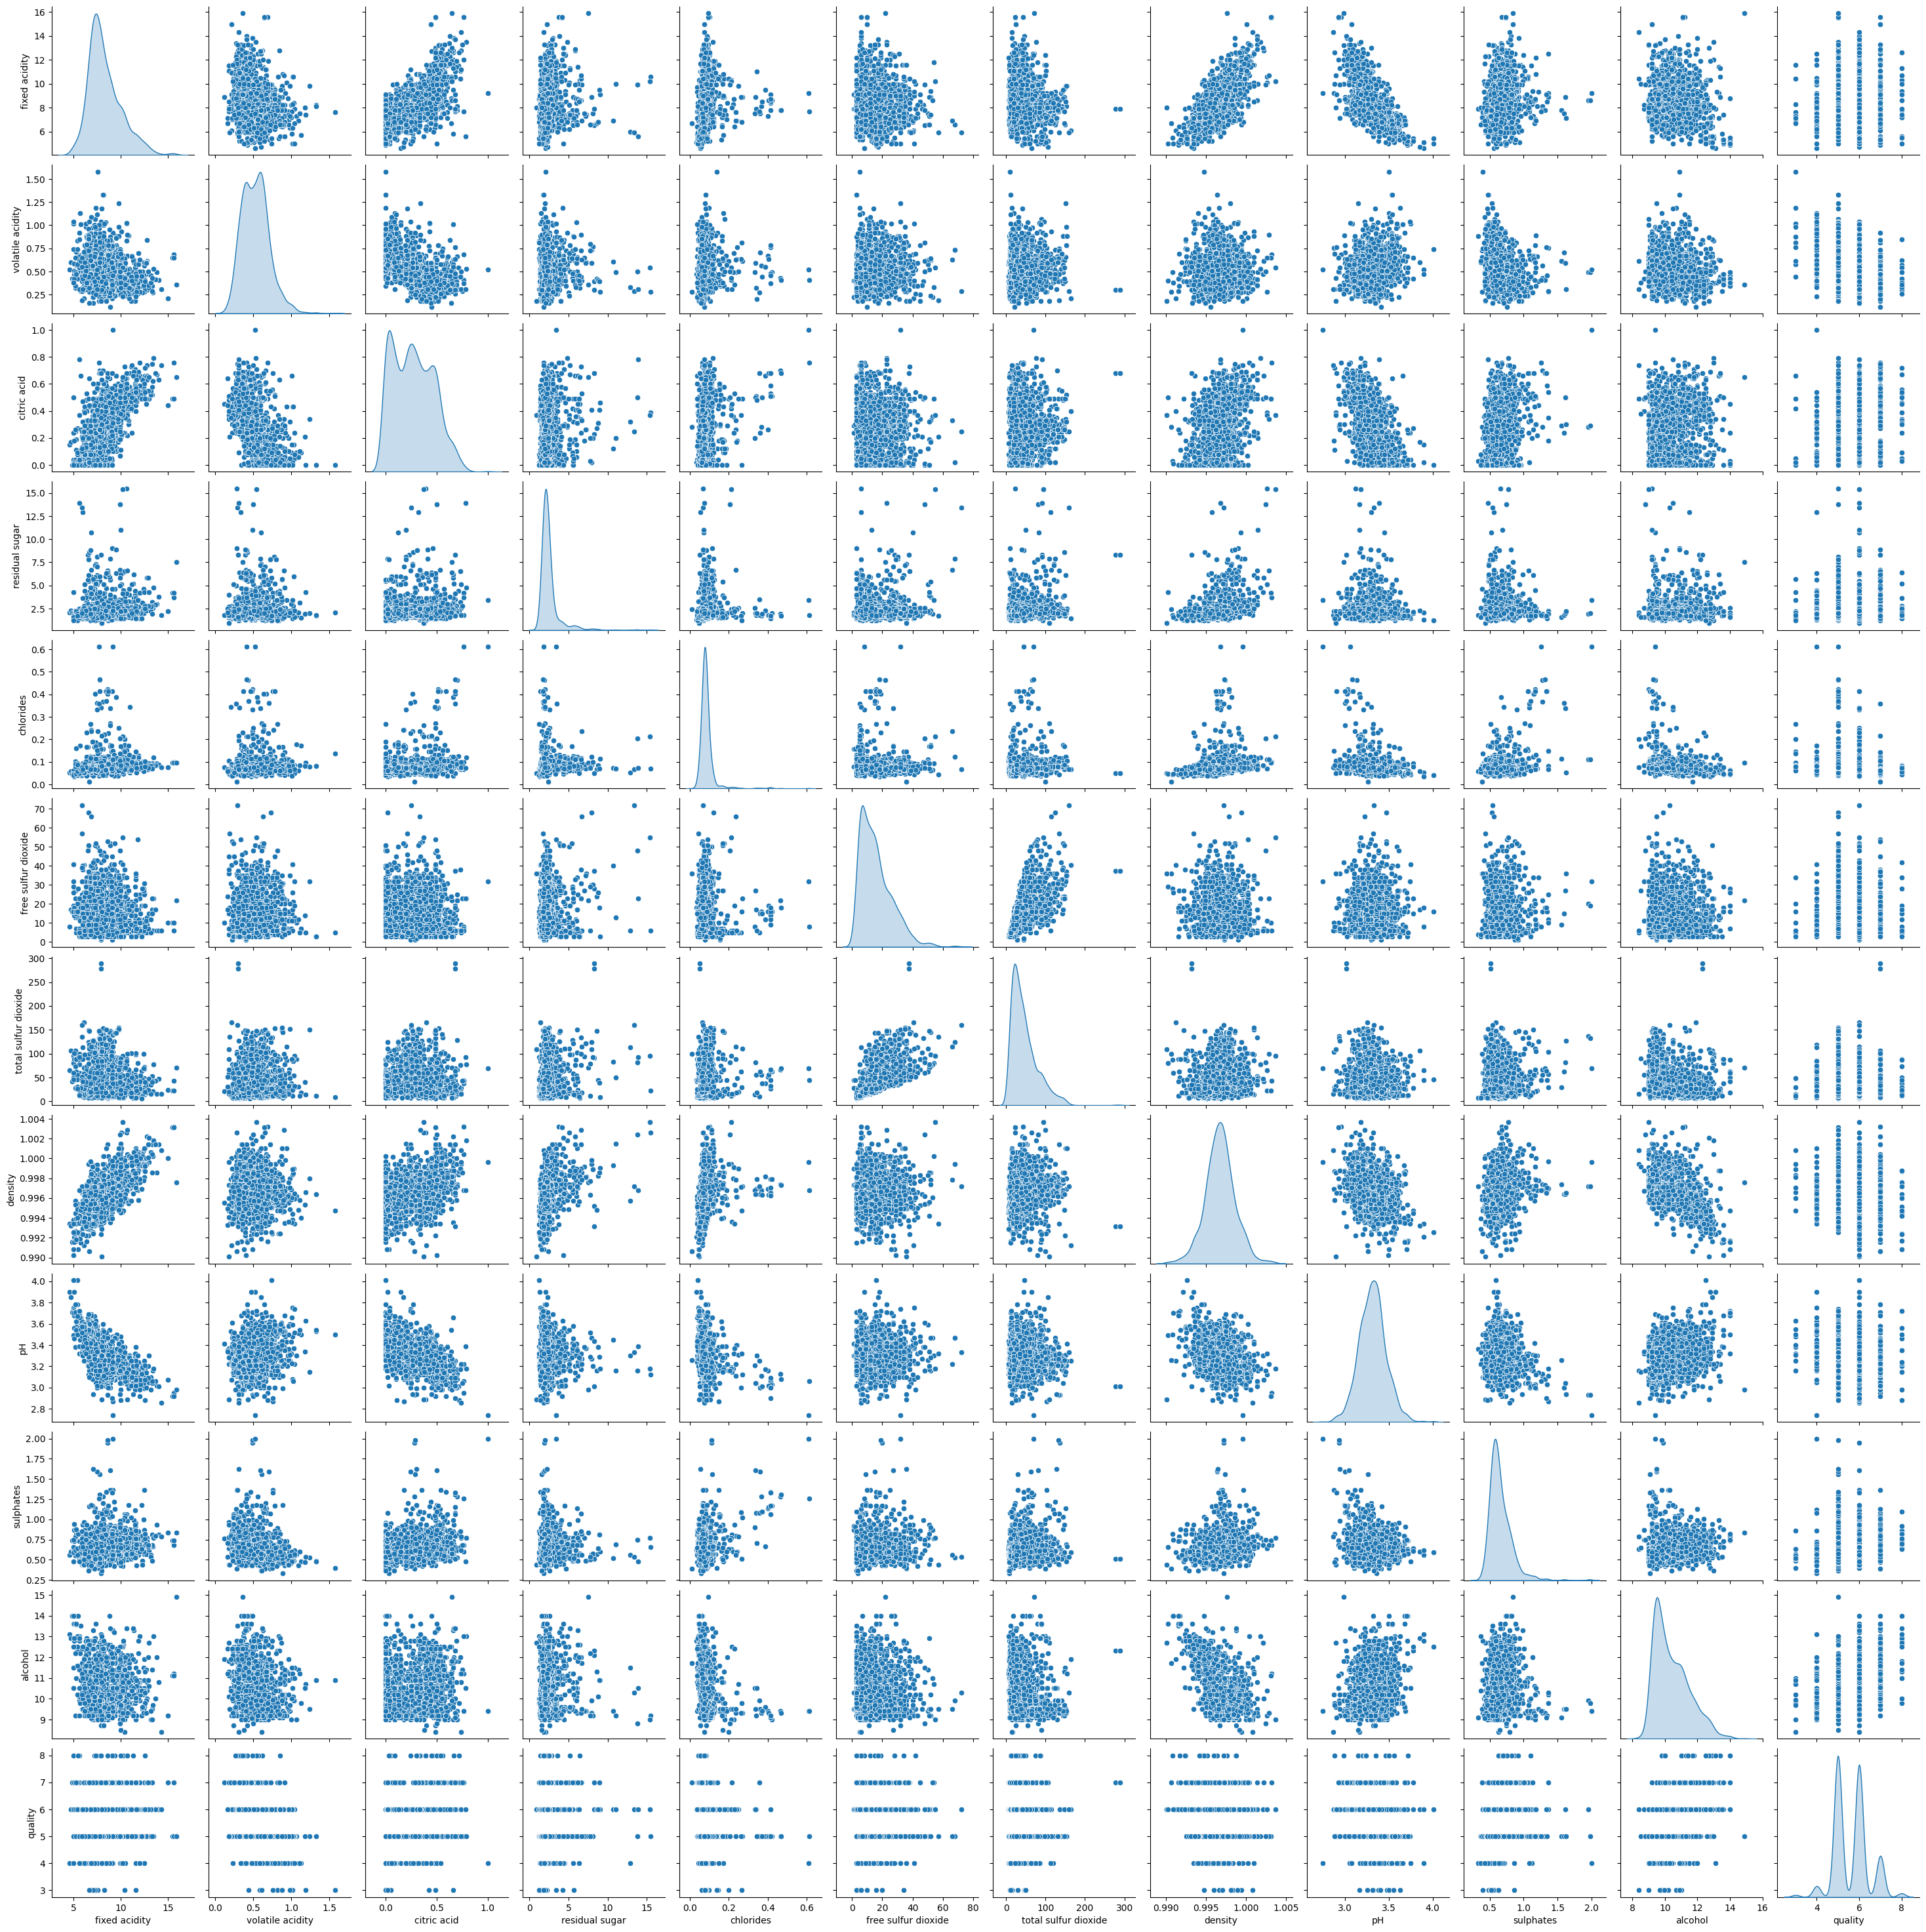

In [4]:
sns.pairplot(dataset, diag_kind='kde')
plt.show()


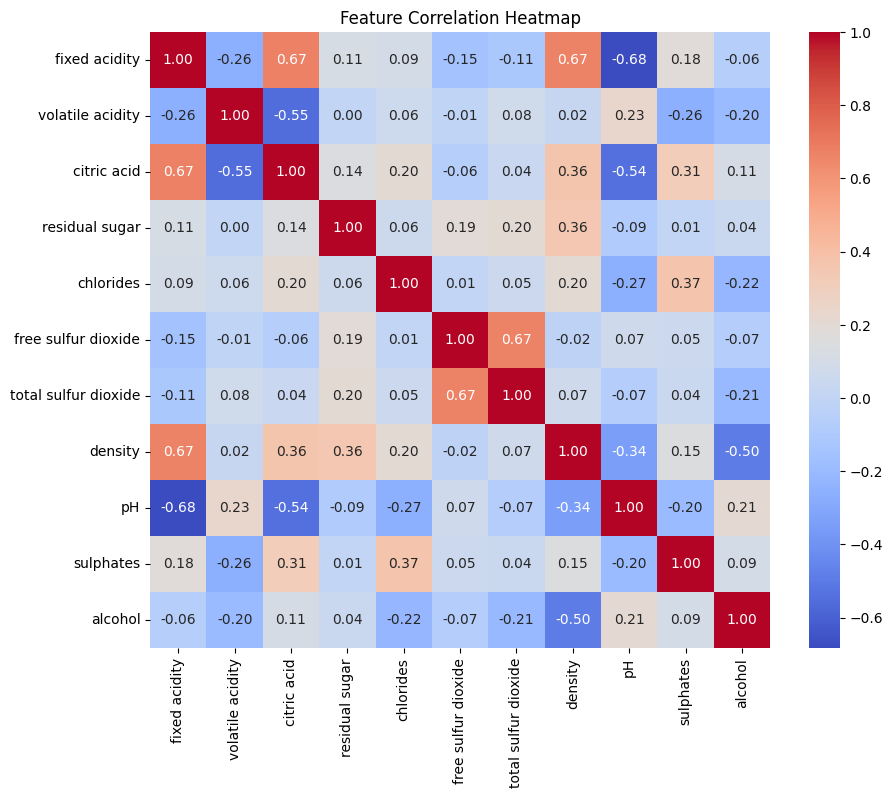

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the target column to focus on feature correlations
corr_data = dataset.drop(columns=['quality'])  # Exclude the target variable
corr_matrix = corr_data.corr()  # Compute the correlation matrix

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')  # Create the heatmap
plt.title("Feature Correlation Heatmap")  # Add a title
plt.show()


In [5]:
import pandas as pd


In [6]:
print(dataset.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [7]:
dataset.fillna(dataset.mean(), inplace=True)


In [8]:
from sklearn.preprocessing import LabelEncoder


In [9]:
dataset['quality'] = LabelEncoder().fit_transform(dataset['quality'])


In [10]:
from sklearn.model_selection import train_test_split


In [11]:
X = dataset.drop(columns=['quality'])
y = dataset['quality']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")


Training set size: (1279, 11), Test set size: (320, 11)


In [13]:
from sklearn.model_selection import KFold


In [26]:
# Importing the required library
from sklearn.model_selection import KFold

# Creating the K-Fold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Splitting the data using K-Fold
for train_index, test_index in kf.split(X):
    # Selecting training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Printing the shapes of splits
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)
    print()  # For better readability


X_train shape: (1279, 11)
X_test shape: (320, 11)
y_train shape: (1279,)
y_test shape: (320,)

X_train shape: (1279, 11)
X_test shape: (320, 11)
y_train shape: (1279,)
y_test shape: (320,)

X_train shape: (1279, 11)
X_test shape: (320, 11)
y_train shape: (1279,)
y_test shape: (320,)

X_train shape: (1279, 11)
X_test shape: (320, 11)
y_train shape: (1279,)
y_test shape: (320,)

X_train shape: (1280, 11)
X_test shape: (319, 11)
y_train shape: (1280,)
y_test shape: (319,)



In [15]:
from sklearn.preprocessing import StandardScaler


In [20]:
# Importing the required library
from sklearn.preprocessing import MinMaxScaler

# Applying Min-Max Scaling
mms = MinMaxScaler()
mms_data = mms.fit_transform(dataset)  # Scaling the data to the range [0, 1]
mms_data = pd.DataFrame(mms_data, columns=dataset.columns)  # Converting back to DataFrame for readability
mms_data.head()  # Display the first few rows


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  
0  0.153846      0.4  
1  0.215385      0.4  
2  0.215385      0.4  
3  0.215385      0.6  
4  0.153846      0.4

In [21]:
# Importing the required library
from sklearn.preprocessing import Normalizer

# Applying Normalization
norm = Normalizer()
norm_data = norm.fit_transform(dataset)  # Normalizing data row-wise
norm_data = pd.DataFrame(norm_data, columns=dataset.columns)  # Converting back to DataFrame
norm_data.head()  # Display the first few rows


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.194882          0.018435     0.000000        0.050037   0.002001   
1       0.107201          0.012094     0.000000        0.035734   0.001347   
2       0.135375          0.013190     0.000694        0.039918   0.001597   
3       0.174177          0.004354     0.008709        0.029548   0.001166   
4       0.194882          0.018435     0.000000        0.050037   0.002001   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.289689              0.895402  0.026277  0.092437   0.014748   
1             0.343592              0.920827  0.013700  0.043980   0.009346   
2             0.260337              0.937212  0.017304  0.056580   0.011281   
3             0.264376              0.933090  0.015520  0.049143   0.009020   
4             0.289689              0.895402  0.026277  0.092437   0.014748   

    alcohol   quality  
0  0.247552  0.052671  
1  0.134688  0.027487  
2  0.170087  0.034712  
3  0.152405  0.046655  
4  0.247552  0.052671

In [22]:
# Importing the required library
from sklearn.preprocessing import StandardScaler

# Applying Standardization
ss = StandardScaler()
ss_data = ss.fit_transform(dataset)  # Standardizing features to have zero mean and unit variance
ss_data = pd.DataFrame(ss_data, columns=dataset.columns)  # Converting back to DataFrame
ss_data.head()  # Display the first few rows


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol   quality  
0 -0.960246 -0.787823  
1 -0.584777 -0.787823  
2 -0.584777 -0.787823  
3 -0.584777  0.450848  
4 -0.960246 -0.787823